In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from EDA_module import PropertyCheck
from scipy.stats import pearsonr

In [25]:
from pathlib import Path
BASE_DIR = Path(__name__).resolve().parent.parent
FILES_DIR = BASE_DIR / 'files'
bidding_df = pd.read_csv(FILES_DIR / 'bidding_results_adding.csv')
bidding_df.drop(columns = 'Price(PC)', inplace=True)
bidding_df.rename(columns = {'Price(Mobile)': 'price'}, inplace=True)
# bidding_df

# 중복 제거 된 데이터 셋(날짜가 같으면서 광고값 중복 제거)
bidding_df = bidding_df.drop_duplicates(subset=['index', 'date'])

# 분석의 핵심이 되는 컬럼명을 리스트로 담아두고 꺼내쓰자
indicator_list = ['Impression',	'Click', 'Cost', 'Sum of AD rank']

In [26]:
len([1,2,3])

3

In [27]:
bidding_check = PropertyCheck(bidding_df, columns=indicator_list)
bidding_check.check_stats()

Impression
count    1.185171e+06
mean     4.170478e+01
std      3.150430e+02
min      0.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      3.000000e+01
max      7.860700e+04
Name: Impression, dtype: float64

Click
count    1.185171e+06
mean     6.892583e-01
std      3.286998e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.740000e+02
Name: Click, dtype: float64

Cost
count    1.185171e+06
mean     1.701701e+02
std      1.713085e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.253000e+05
Name: Cost, dtype: float64

Sum of AD rank
count    1.185162e+06
mean     1.162497e+01
std      1.355340e+01
min      1.000000e+00
25%      3.750000e+00
50%      7.206897e+00
75%      1.371429e+01
max      1.000000e+02
Name: Sum of AD rank, dtype: float64



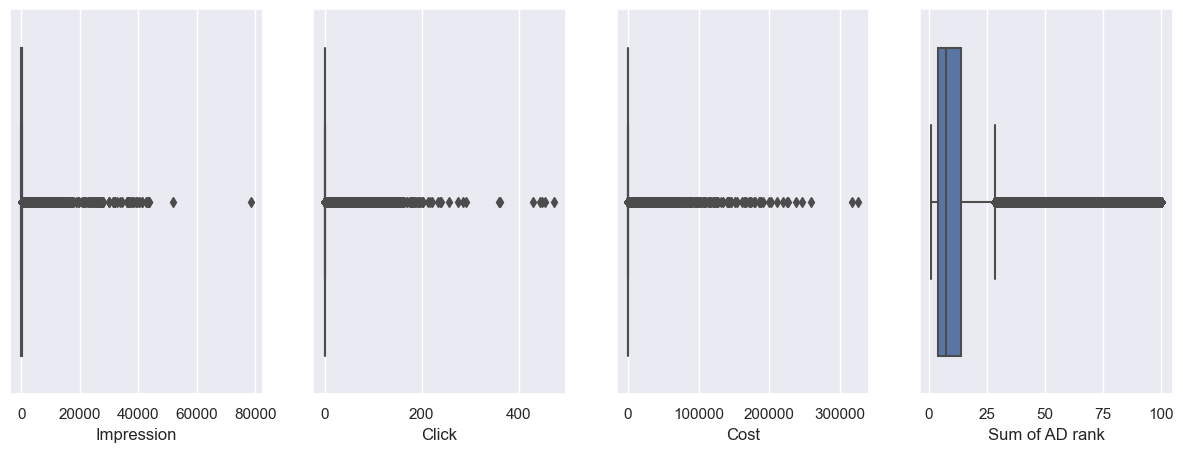

In [28]:
bidding_check.check_boxplot()

In [29]:
len(bidding_df)

1185171

In [30]:
price_list = set([price for price in bidding_df.price])
len(price_list)

7516

In [31]:
categorys = list(set(bidding_df['Category Name 1'].to_list()))
categorys

['화장품/미용',
 '생활/건강',
 '디지털/가전',
 '가구/인테리어',
 '패션의류',
 '출산/육아',
 '식품',
 '스포츠/레저',
 '패션잡화',
 '여가/생활편의']

### 카테고리 고정시켜고 분석해보자. 
    - bidding_df의 row는 110만 이상: 집단의 특성을 나눠 분석하면 모집단과 다른 특징을 보이는 집단이 있을까?
      - mark = bidding_df['Category Name 1'] == '가구/인테리어'
      - 위 카테고리를 고정시킨 segment_df를 생성 후 분석해보자

In [32]:
mark = bidding_df['Category Name 1'] == '가구/인테리어'
segment_df = bidding_df[mark]

segment_df

,index,Impression,Click,Cost,Sum of AD rank,Bid,price,Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
0,3575092,3,0,0.0,3.000000,50,165900,0,가구/인테리어,침실가구,장롱/붙박이장,드레스룸,20221031
1,3575637,6,0,0.0,3.333333,50,10900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20221031
2,4129259,7,0,0.0,8.000000,50,255000,-1,가구/인테리어,거실가구,소파,패브릭소파,20221031
3,4131479,36,3,150.0,4.416667,140,190000,20000,가구/인테리어,아동/주니어가구,책상의자세트,NaN,20221031
4,4131482,224,0,0.0,5.696429,50,129000,0,가구/인테리어,아동/주니어가구,책상,NaN,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337074,2564155,5,1,190.0,14.800000,50,98900,-1,가구/인테리어,침실가구,침대,침대프레임,20230103
1337075,2564184,10,0,0.0,5.000000,50,325000,20000,가구/인테리어,거실가구,테이블,거실테이블,20230103
1337083,2566795,5,0,0.0,13.200000,500,19900,0,가구/인테리어,인테리어소품,아로마/캔들용품,아로마방향제/디퓨저,20230103
1337085,2566881,1,0,0.0,8.000000,500,2500,3000,가구/인테리어,인테리어소품,기타장식용품,NaN,20230103


In [33]:
segment_check = PropertyCheck(segment_df, columns=indicator_list)
segment_check.check_stats()

Impression
count    846801.000000
mean         39.432973
std         332.167650
min           0.000000
25%           3.000000
50%           9.000000
75%          28.000000
max       51982.000000
Name: Impression, dtype: float64

Click
count    846801.000000
mean          0.584941
std           2.557860
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         292.000000
Name: Click, dtype: float64

Cost
count    846801.000000
mean        157.620633
std        1647.276995
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      325300.000000
Name: Cost, dtype: float64

Sum of AD rank
count    846795.000000
mean         11.821358
std          13.503234
min           1.000000
25%           3.937500
50%           7.500000
75%          14.000000
max         100.000000
Name: Sum of AD rank, dtype: float64



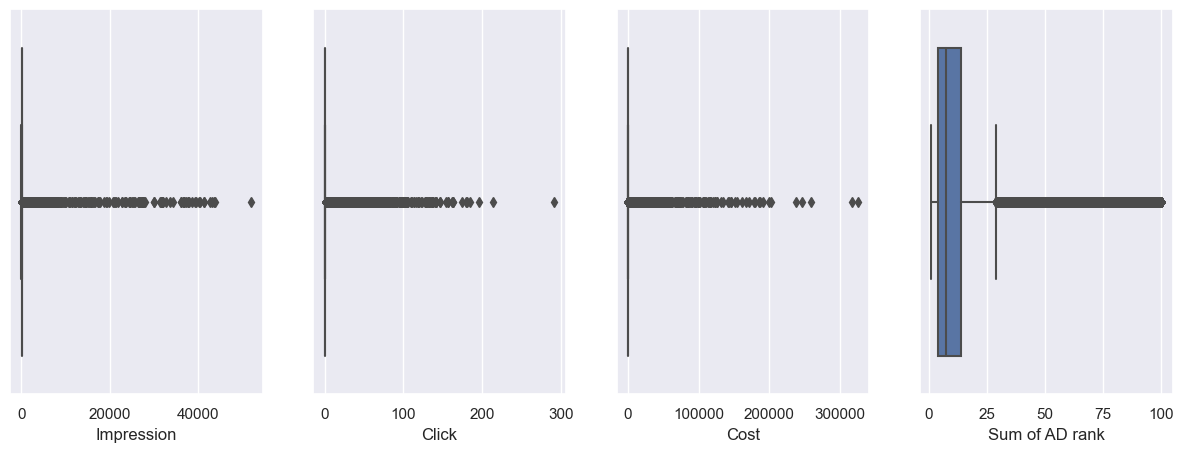

In [34]:
segment_check.check_boxplot()

- 다른 카테고리들고 확인해보자

화장품/미용
Impression
count    6769.000000
mean       44.512040
std       110.088985
min         1.000000
25%         6.000000
50%        18.000000
75%        46.000000
max      4432.000000
Name: Impression, dtype: float64

Click
count    6769.000000
mean        0.813562
std         2.599120
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        51.000000
Name: Click, dtype: float64

Cost
count     6769.000000
mean       180.048752
std       1089.723047
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      49130.000000
Name: Cost, dtype: float64

Sum of AD rank
count    6769.000000
mean        7.257407
std         8.444913
min         1.000000
25%         3.099678
50%         5.351351
75%         8.250000
max       100.000000
Name: Sum of AD rank, dtype: float64

None


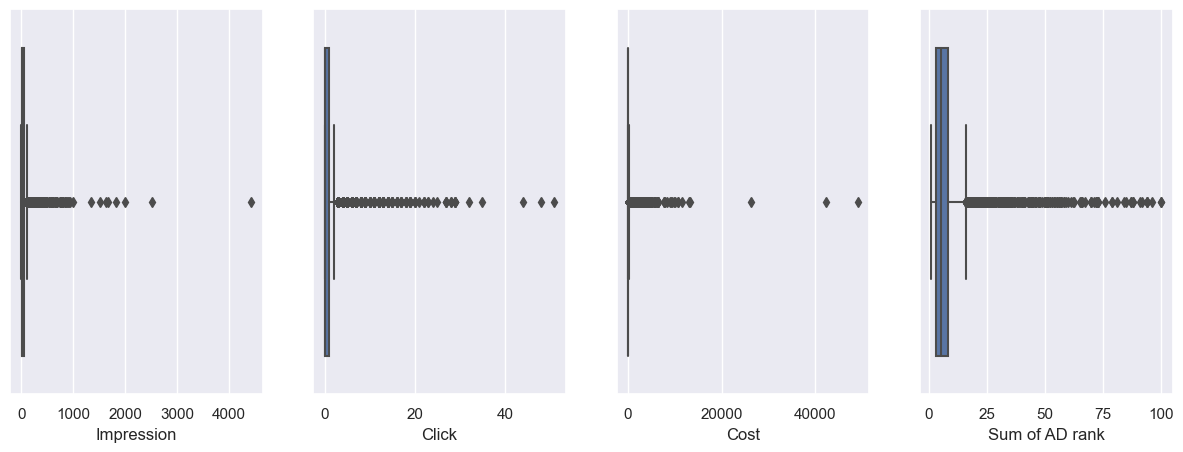

None
생활/건강
Impression
count    280520.000000
mean         43.580144
std         276.788041
min           0.000000
25%           3.000000
50%          10.000000
75%          32.000000
max       78607.000000
Name: Impression, dtype: float64

Click
count    280520.000000
mean          0.839869
std           4.364069
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         474.000000
Name: Click, dtype: float64

Cost
count    280520.000000
mean        194.666477
std        1935.047369
min           0.000000
25%           0.000000
50%           0.000000
75%          50.000000
max      226050.000000
Name: Cost, dtype: float64

Sum of AD rank
count    280517.000000
mean         11.510383
std          14.058677
min           1.000000
25%           3.444444
50%           6.818182
75%          13.096774
max         100.000000
Name: Sum of AD rank, dtype: float64

None


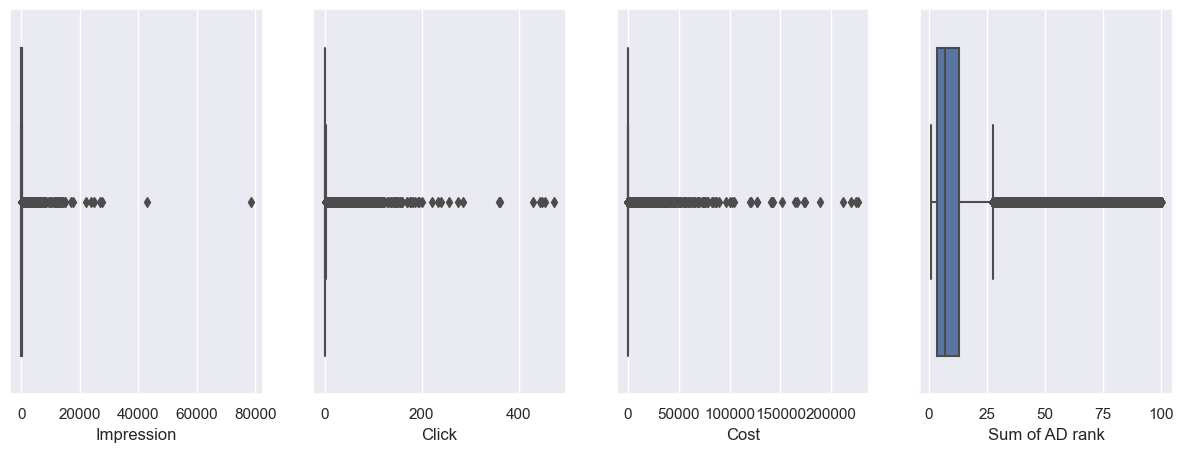

None
디지털/가전
Impression
count    4952.000000
mean      100.330170
std       240.828323
min         1.000000
25%         6.000000
50%        25.000000
75%        98.000000
max      4488.000000
Name: Impression, dtype: float64

Click
count    4952.000000
mean        1.697900
std         4.834319
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        76.000000
Name: Click, dtype: float64

Cost
count     4952.000000
mean       220.203958
std       1162.488911
min          0.000000
25%          0.000000
50%          0.000000
75%        100.000000
max      42100.000000
Name: Cost, dtype: float64

Sum of AD rank
count    4952.000000
mean        7.790247
std         8.768367
min         1.000000
25%         3.059906
50%         5.357584
75%         9.000000
max       100.000000
Name: Sum of AD rank, dtype: float64

None


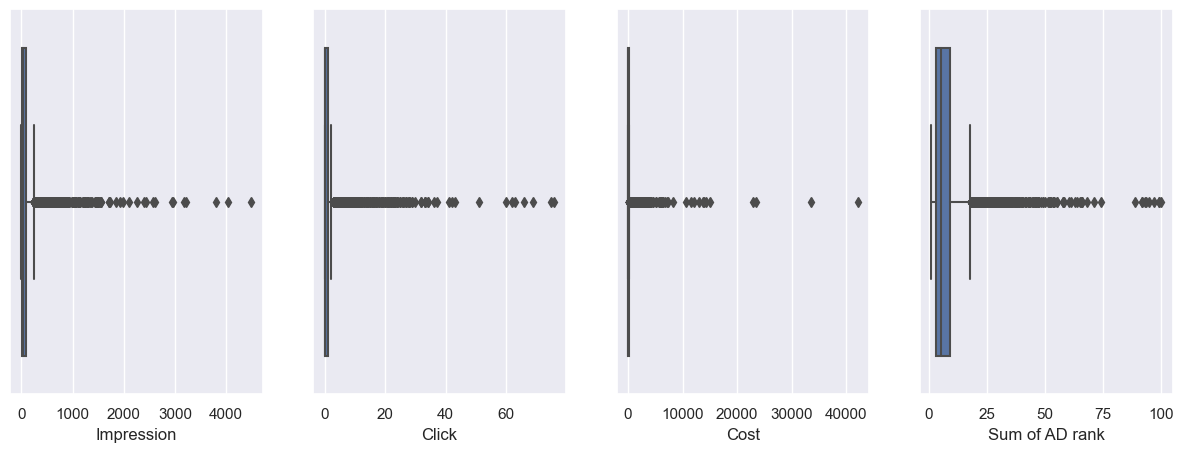

None
가구/인테리어
Impression
count    846801.000000
mean         39.432973
std         332.167650
min           0.000000
25%           3.000000
50%           9.000000
75%          28.000000
max       51982.000000
Name: Impression, dtype: float64

Click
count    846801.000000
mean          0.584941
std           2.557860
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         292.000000
Name: Click, dtype: float64

Cost
count    846801.000000
mean        157.620633
std        1647.276995
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      325300.000000
Name: Cost, dtype: float64

Sum of AD rank
count    846795.000000
mean         11.821358
std          13.503234
min           1.000000
25%           3.937500
50%           7.500000
75%          14.000000
max         100.000000
Name: Sum of AD rank, dtype: float64

None


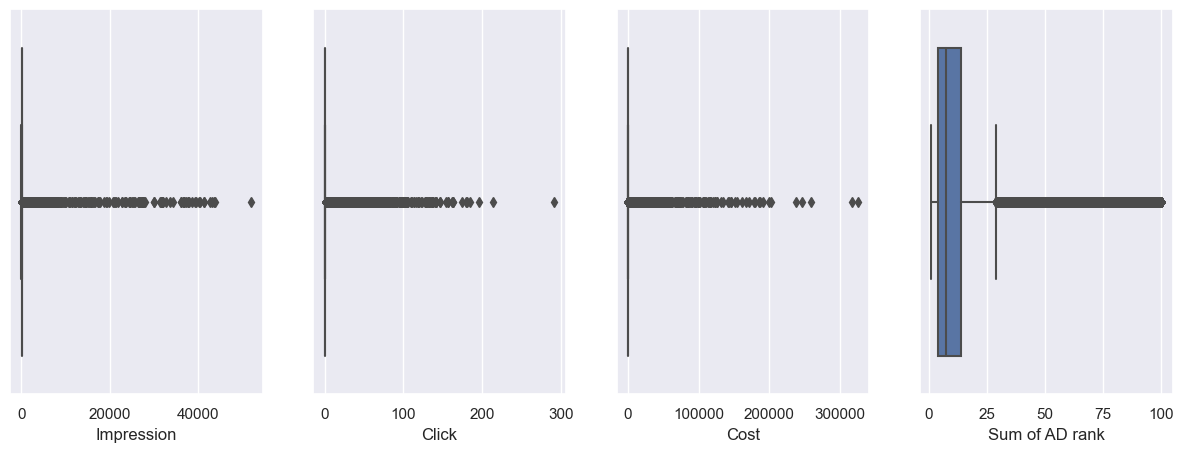

None
패션의류
Impression
count    2073.000000
mean       51.248915
std       171.637694
min         1.000000
25%         3.000000
50%        10.000000
75%        33.000000
max      3228.000000
Name: Impression, dtype: float64

Click
count    2073.000000
mean        1.086831
std         4.737021
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        75.000000
Name: Click, dtype: float64

Cost
count     2073.000000
mean       347.288953
std       1861.302758
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      28200.000000
Name: Cost, dtype: float64

Sum of AD rank
count    2073.000000
mean       10.917904
std        10.917999
min         1.000000
25%         4.000000
50%         7.787234
75%        13.818182
max        95.000000
Name: Sum of AD rank, dtype: float64

None


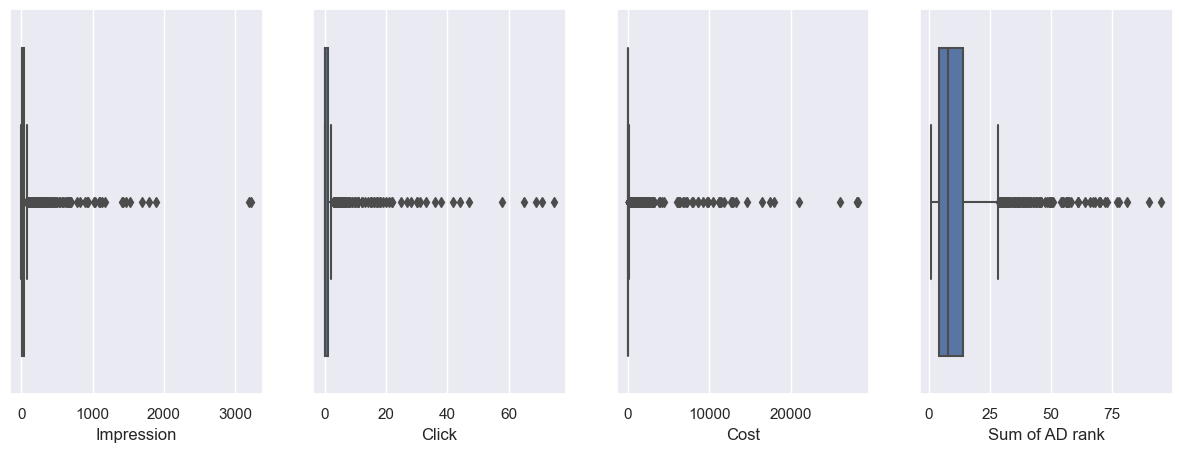

None
출산/육아
Impression
count    22000.000000
mean        75.484864
std        174.965765
min          1.000000
25%          9.000000
50%         25.000000
75%         70.000000
max       7007.000000
Name: Impression, dtype: float64

Click
count    22000.000000
mean         2.056591
std          7.062991
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        238.000000
Name: Click, dtype: float64

Cost
count    22000.000000
mean       274.371818
std       1723.128958
min          0.000000
25%          0.000000
50%          0.000000
75%        100.000000
max      74180.000000
Name: Cost, dtype: float64

Sum of AD rank
count    22000.000000
mean         7.560854
std          8.906605
min          1.000000
25%          2.875285
50%          5.166667
75%          8.892477
max        100.000000
Name: Sum of AD rank, dtype: float64

None


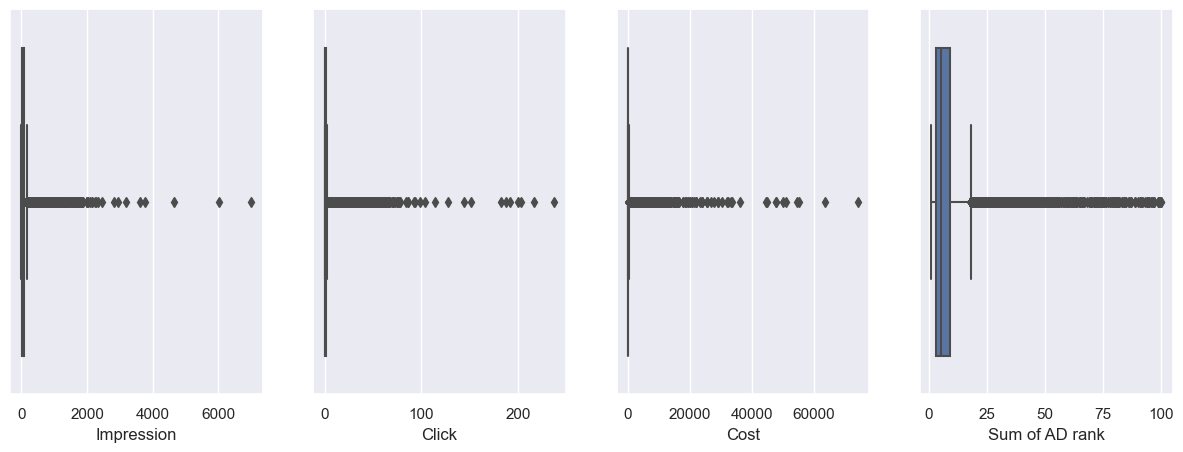

None
식품
Impression
count    183.000000
mean      26.163934
std       40.094194
min        1.000000
25%        3.000000
50%       10.000000
75%       34.000000
max      328.000000
Name: Impression, dtype: float64

Click
count    183.000000
mean       0.103825
std        0.355702
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: Click, dtype: float64

Cost
count    183.000000
mean       9.453552
std       38.740143
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      330.000000
Name: Cost, dtype: float64

Sum of AD rank
count    183.000000
mean      10.621366
std        8.633815
min        1.285714
25%        6.000000
50%        8.750000
75%       12.103175
max       73.000000
Name: Sum of AD rank, dtype: float64

None


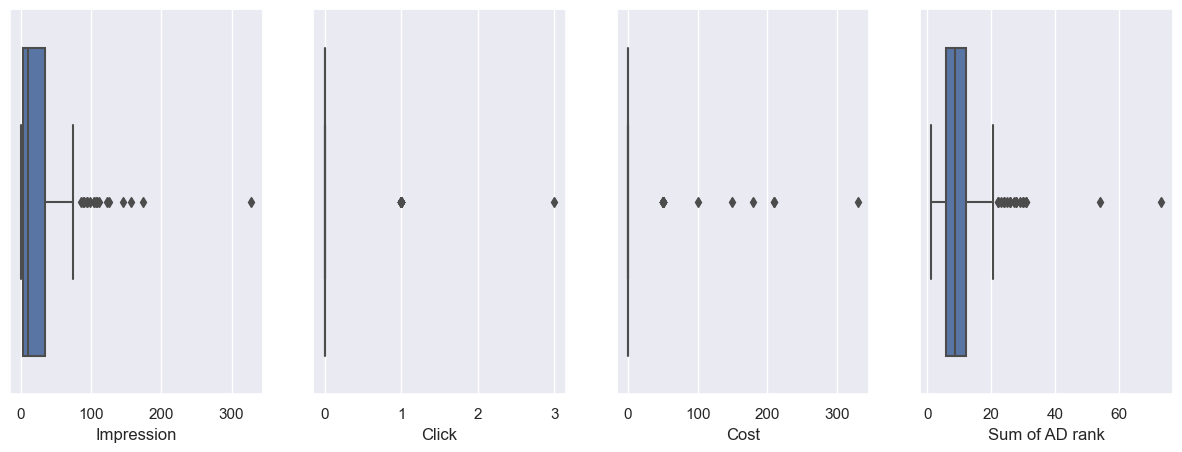

None
스포츠/레저
Impression
count    14223.000000
mean        58.790761
std        299.849371
min          1.000000
25%          4.000000
50%         14.000000
75%         45.000000
max      12819.000000
Name: Impression, dtype: float64

Click
count    14223.000000
mean         1.185896
std          5.371938
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        150.000000
Name: Click, dtype: float64

Cost
count    14223.000000
mean       188.256345
std       1220.579626
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      90770.000000
Name: Cost, dtype: float64

Sum of AD rank
count    14223.000000
mean        11.744170
std         14.255185
min          1.000000
25%          3.535735
50%          7.000000
75%         13.500000
max        100.000000
Name: Sum of AD rank, dtype: float64

None


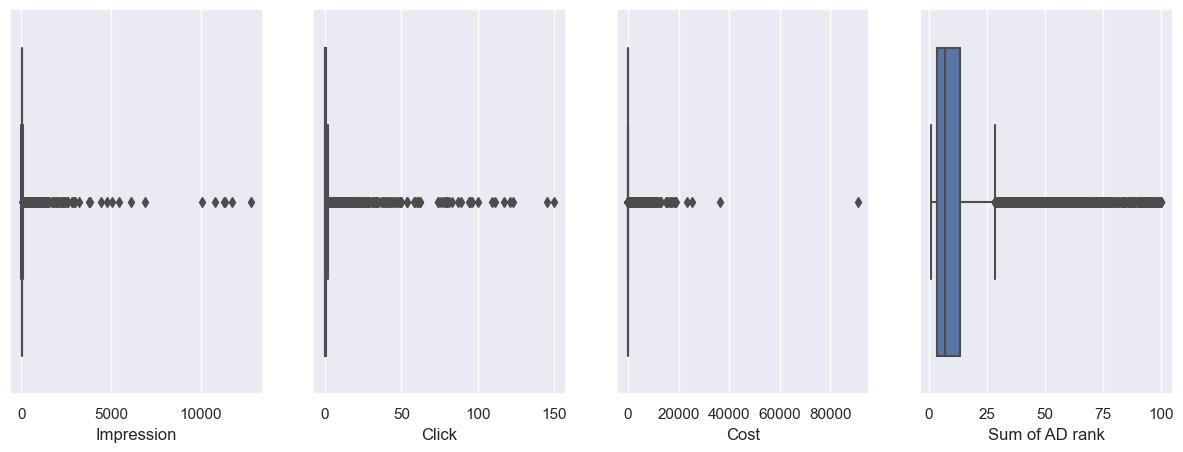

None
패션잡화
Impression
count    6935.000000
mean       45.079019
std       171.145669
min         1.000000
25%         3.000000
50%         9.000000
75%        30.000000
max      3932.000000
Name: Impression, dtype: float64

Click
count    6935.000000
mean        0.917664
std         4.223016
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       136.000000
Name: Click, dtype: float64

Cost
count     6935.000000
mean       250.963230
std       1726.860808
min          0.000000
25%          0.000000
50%          0.000000
75%         50.000000
max      49890.000000
Name: Cost, dtype: float64

Sum of AD rank
count    6935.000000
mean       12.620719
std        13.929577
min         1.000000
25%         4.318562
50%         8.000000
75%        15.074074
max       100.000000
Name: Sum of AD rank, dtype: float64

None


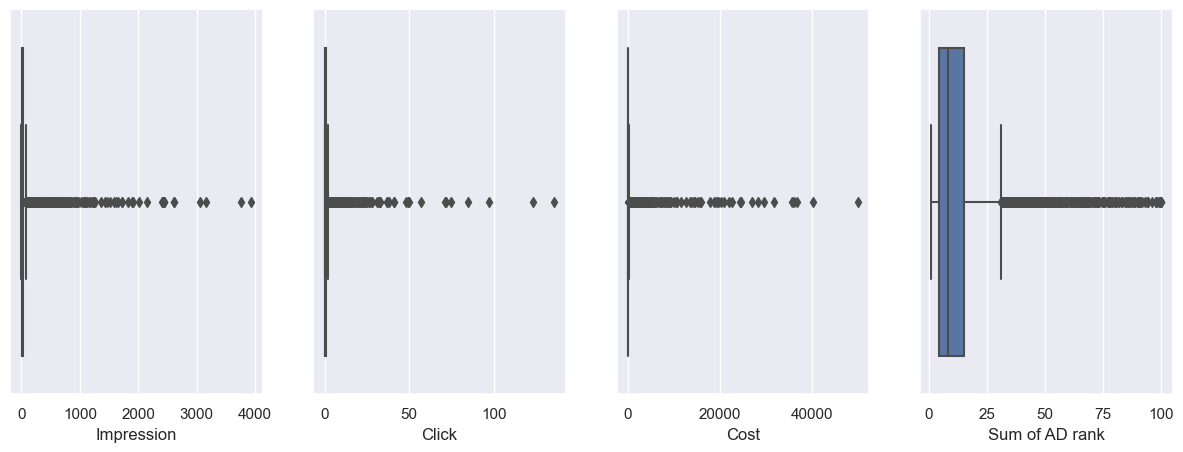

None
여가/생활편의
Impression
count     715.000000
mean      128.220979
std       300.564882
min         1.000000
25%         7.000000
50%        41.000000
75%       157.000000
max      3013.000000
Name: Impression, dtype: float64

Click
count    715.000000
mean       1.813986
std        4.689260
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       35.000000
Name: Click, dtype: float64

Cost
count     715.000000
mean      160.097902
std       407.871934
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3560.000000
Name: Cost, dtype: float64

Sum of AD rank
count    715.000000
mean       7.226649
std       13.710956
min        1.000000
25%        2.000000
50%        3.000000
75%        6.143382
max       90.000000
Name: Sum of AD rank, dtype: float64

None


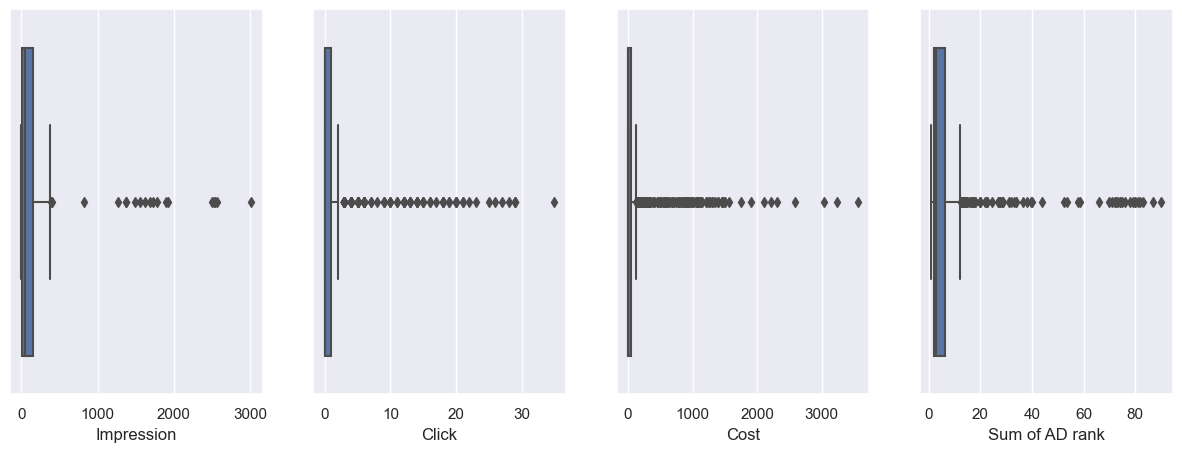

None


In [23]:
for category in categorys:
    mark = bidding_df['Category Name 1'] == category
    segment_df = bidding_df[mark]
    print(category)
    print(PropertyCheck(segment_df, columns=indicator_list).check_stats())
    print(PropertyCheck(segment_df, columns=indicator_list).check_boxplot())

### <중간 점검> 
    - 모집단의 boxplot과 각 카테고리를 'Category Name 1'을 기준으로 나눈 뒤 boxplot을 확인한 결과 유사한 형태를 보인다.
      - 이상치가 상당히 많다는 점
      - 'Sum of AD rank'의 박스가 가장 두껍다는 점
  
    - 카테고리를 하나로 선택한 뒤 다른 기준으로 세분화하면 어떻게될 것인지 확인해보자
      - mark1 = bidding_df['Category Name 1'] == '가구/인테리어'
      - mark2 = bidding_df['Category Name 2'] == '서재/사무용가구'
      - mark3 = bidding_df['Category Name 3'] == '책장'
      - 그 후 price를 기준으로 분석해보자

In [37]:
mark1 = bidding_df['Category Name 1'] == '가구/인테리어'
mark2 = bidding_df['Category Name 2'] == '서재/사무용가구'
mark3 = bidding_df['Category Name 3'] == '책장'
segment_df = bidding_df[mark1&mark2&mark3]

segment_df

,index,Impression,Click,Cost,Sum of AD rank,Bid,price,Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
64,4997032,95,0,0.0,5.705263,50,203000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221031
65,4997036,69,0,0.0,6.637681,50,289000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221031
107,5642863,11,0,0.0,6.363636,50,242000,10000,가구/인테리어,서재/사무용가구,책장,NaN,20221031
399,9732197,27,0,0.0,10.185185,50,189000,-1,가구/인테리어,서재/사무용가구,책장,NaN,20221031
400,9732217,43,3,570.0,4.790698,250,54900,-1,가구/인테리어,서재/사무용가구,책장,NaN,20221031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336630,2425137,9,1,330.0,4.444444,500,89000,-1,가구/인테리어,서재/사무용가구,책장,NaN,20230103
1336631,2425139,25,1,50.0,12.040000,500,41900,15000,가구/인테리어,서재/사무용가구,책장,NaN,20230103
1336632,2425140,21,0,0.0,2.619048,500,42900,0,가구/인테리어,서재/사무용가구,책장,NaN,20230103
1336635,2425143,45,0,0.0,7.133333,500,119000,15000,가구/인테리어,서재/사무용가구,책장,NaN,20230103


In [39]:
fix_price_dict = {}
for price in segment_df.price:
    fix_price_dict[price] = segment_df[segment_df.price == price]

fix_price_dict
fix_price_dict.keys()
fix_price_dict[149000].Click.value_counts()

0    90
1    10
5     3
2     2
Name: Click, dtype: int64

In [54]:
fix_price_dict

{203000:           index  Impression  Click  Cost  Sum of AD rank  Bid   price  \
 64      4997032          95      0   0.0        5.705263   50  203000   
 13161   4997032          95      0   0.0        7.884211   50  203000   
 26494   4997032          61      1  60.0        7.836066   50  203000   
 39945   4997032         101      1  60.0        8.009901   50  203000   
 53430   4997032         121      0   0.0        7.644628   50  203000   
 66809   4997032          71      0   0.0        5.267606   50  203000   
 80101   4997032         178      0   0.0        6.769663   50  203000   
 94249   4997032         104      1  50.0        6.519231   50  203000   
 108147  4997032          30      0   0.0        4.900000   50  203000   
 122706  4997032          27      0   0.0        8.333333   50  203000   
 137370  4997032          39      0   0.0        5.871795   50  203000   
 152347  4997032          35      0   0.0        5.085714   50  203000   
 167580  4997032         120  

- 가격이 375000일 때 클릭수를 확인해보자 
- 광고 이름이 3519548인 경우에만 클릭이 발생했음을 확인

In [46]:
one_price_ex = fix_price_dict[375000]
one_price_ex[one_price_ex.Click == 0]
#one_price_ex[one_price_ex.Click == 1]
#one_price_ex[one_price_ex.Click == 2]
one_price_ex[(one_price_ex.Click == 0) & (one_price_ex.index ==3519548)]

,index,Impression,Click,Cost,Sum of AD rank,Bid,price,Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date


In [47]:
bidding_df[bidding_df['index'] == 8755464]

,index,Impression,Click,Cost,Sum of AD rank,Bid,price,Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
6181,8755464,54,0,0.0,8.462963,50,375000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221031
19244,8755464,34,0,0.0,11.705882,50,375000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221101
32636,8755464,55,0,0.0,10.909091,50,375000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221102
46083,8755464,32,0,0.0,10.750000,50,375000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221103
59487,8755464,32,0,0.0,10.875000,50,375000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221104
72793,8755464,90,0,0.0,11.433333,50,375000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221105
86550,8755464,84,0,0.0,9.880952,50,375000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221106
100438,8755464,61,0,0.0,12.098361,50,375000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221107
114214,8755464,37,0,0.0,12.945946,50,375000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221108
128615,8755464,21,0,0.0,10.476190,50,375000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221109


### <중간정리>
    고정값: 
    1) 'Category Name 1' == '가구/인테리어'
    2) 'Category Name 2' == '서재/사무용가구'
    3) 'Category Name 3' == '책장'
    4) price == 375000

    결과:
    발제품이름이 3519548인 경우에만 클릭 발생

    가설: 
    특정 광고는 아예 인기가 없는 것이 아닐까?

### <가설 확인 방법>
    - 클릭이 아예 없는 집단과 그렇지 않은 집단을 비교해보자

In [49]:
click_kind_dict = {}
for price, df in fix_price_dict.items():
    #print(type(fix_price_dict[key].Click.value_counts()))
    click_kind_dict[price] = fix_price_dict[price].Click.value_counts().index

In [50]:
click_kind_dict[203000]

Int64Index([0, 1], dtype='int64')

In [53]:
fix_price_dict.keys()

dict_keys([203000, 289000, 242000, 189000, 54900, 29000, 59900, 319000, 119000, 69900, 158000, 59800, 72300, 252300, 169000, 27200, 190000, 114950, 171000, 255000, 387000, 215000, 252000, 448000, 286000, 180000, 313000, 385000, 211000, 67700, 194000, 217000, 687300, 450000, 301000, 249000, 53000, 39900, 58000, 245000, 324000, 77000, 185000, 99000, 410000, 49900, 122000, 20500, 38900, 253000, 560000, 218000, 423000, 287000, 375000, 362000, 196000, 154000, 261000, 797000, 230000, 300000, 150000, 55000, 224000, 330000, 213000, 364000, 407000, 297000, 369000, 221000, 321000, 29900, 390000, 310000, 167000, 136000, 160000, 349000, 202000, 135000, 400000, 329000, 129000, 38700, 22500, 81900, 99900, 139000, 42900, 384000, 111400, 59000, 239000, 405000, 355000, 159000, 199000, 179000, 269000, 205000, 273000, 134000, 48000, 124000, 33900, 41900, 50900, 67000, 34000, 47000, 15000, 24000, 74000, 72000, 144000, 84000, 259000, 299000, 142000, 162000, 89000, 28900, 44900, 229000, 65900, 60000, 335000

In [43]:
# key = 가격
# value = dictionary -> key = 클릭 수, value = 광고이름 
ads_dict = {}

for price, click_list in click_kind_dict.items():
    inner_dict = {}
    
    for click in click_list:
        mark = fix_price_dict[price]['Click'] == click
        temp_df = fix_price_dict[price][mark]
        
        inner_dict[click] = list(temp_df[temp_df.Click == click]['index'].unique())
    
    ads_dict[price] = inner_dict


In [46]:
ads_dict[289000]#.values()

{0: [4997036,
  8755462,
  3292848,
  3300148,
  3519545,
  3541154,
  4896114,
  4930952,
  3519578,
  3541176],
 1: [4997036, 3519545, 3292848, 4896114, 3519578, 4930952, 3541176],
 3: [4997036, 3519578],
 2: [4997036],
 5: [4997036]}

In [48]:
fix_price_dict[289000][fix_price_dict[289000]['Click'] == 0]

,index,Impression,Click,Cost,Sum of AD rank,Bid,price,Delivery Fee,Category Name 1,Category Name 2,Category Name 3,Category Name 4,date
65,4997036,69,0,0.0,6.637681,50,289000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221031
6179,8755462,4,0,0.0,6.500000,50,289000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221031
19242,8755462,3,0,0.0,3.000000,50,289000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221101
32634,8755462,4,0,0.0,59.250000,50,289000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221102
46081,8755462,3,0,0.0,43.000000,50,289000,0,가구/인테리어,서재/사무용가구,책장,NaN,20221103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270044,4930952,14,0,0.0,3.071429,1250,289000,-1,가구/인테리어,서재/사무용가구,책장,NaN,20230101
1287883,3292848,3,0,0.0,8.000000,180,289000,0,가구/인테리어,서재/사무용가구,책장,NaN,20230102
1288329,3300148,4,0,0.0,31.750000,1220,289000,0,가구/인테리어,서재/사무용가구,책장,NaN,20230102
1316608,3292848,3,0,0.0,4.333333,180,289000,0,가구/인테리어,서재/사무용가구,책장,NaN,20230103


In [49]:
# 광고이름이 0에는 없고 1 이상에만 있는 경우를 찾아내자.
# 광고이름이 제품의 이름이라면 결국, 해당 제품들은 소비자의 충성도가 높은 제품임으로 광고에 민감하지 않을 것이다.

In [63]:
print(ads_dict[289000][0])
print(ads_dict[289000][1])
ads_dict[289000][0] == ads_dict[289000][1]

[4997036, 8755462, 3292848, 3300148, 3519545, 3541154, 4896114, 4930952, 3519578, 3541176]
[4997036, 3519545, 3292848, 4896114, 3519578, 4930952, 3541176]


False

In [64]:
# 모든 광고이름 정보를 갖는 리스트 생성
for ads in ads_dict[289000][0]: 
    if ads in ads_dict[289000][1]:
        ads_dict[289000][1].remove(ads)
        print(ads_dict[289000][1])

[3519545, 3292848, 4896114, 3519578, 4930952, 3541176]
[3519545, 4896114, 3519578, 4930952, 3541176]
[4896114, 3519578, 4930952, 3541176]
[3519578, 4930952, 3541176]
[3519578, 3541176]
[3541176]
[]


In [ ]:
# 클릭이 있는 경우와 없는 경우로 나눈다
# 무조건 클릭한 광고에 대해 알아보자
no_click_df = bidding_df[bidding_df['Click'] == 0]
no_click_df
dd_no_click_df = no_click_df[mark1 & mark2 & mark3]

click_df = bidding_df[bidding_df['Click'] != 0]
click_df
dd_click_df = click_df[mark1 & mark2 & mark3]

set1 = set(dd_no_click_df['index'])
set2 = set(dd_click_df['index'])
my_list = set2.difference(set1)

for i in my_list:
    display(dd_click_df[dd_click_df['index'] == i])